In [37]:
# Premier exemple : REGRESSION LINEAIRE SIMPLE 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv('~/Documents/Ia-Datasets/regressions/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [41]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [42]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

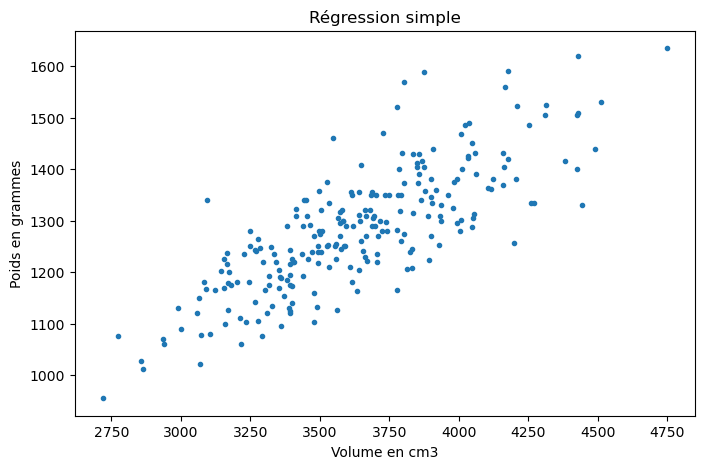

In [43]:
plt.figure(figsize=(8,5))
plt.plot(X,Y, 'o', markersize=3)
plt.title('Régression simple')
plt.xlabel('Volume en cm3')
plt.ylabel('Poids en grammes');

In [44]:
# Premier modèle avec Seaborn

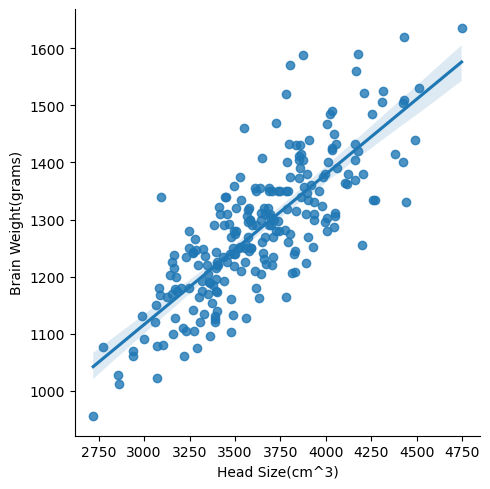

In [45]:
sns.lmplot(x='Head Size(cm^3)', y='Brain Weight(grams)', data=data);

Note sur le grahique, on voit 2 espaces où il n'y a pas de points. C'est parce que les données sont discrètes et non continues.

In [46]:
# Deuxième modèle : sklearn

In [47]:
from sklearn.linear_model import LinearRegression

X=data[['Head Size(cm^3)']]
Y=data['Brain Weight(grams)'].values
reg=LinearRegression()
modele=reg.fit(X,Y)

In [48]:
modele.coef_

array([0.26342934])

In [49]:
modele.intercept_

325.573421049442

In [50]:
# L'équation est : Poids du cerveau = 0.2634 x Volume + 325.57

In [51]:
modele.score(X,Y)   # Retourne le R²

0.6393117199570001

In [52]:
modele.predict([[4000]])

/Users/loic/mambaforge/envs/ml/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1379.29077901])

In [53]:
# Troisième modèle : Statsmodels OLS

In [54]:
import statsmodels.api as sm

In [55]:
X=data['Head Size(cm^3)']
Y=data['Brain Weight(grams)']
X=np.vander(X,2)
modele=sm.OLS(Y,X)
resultat=modele.fit()
resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.638
Method:                  Least Squares   F-statistic:                     416.5
Date:                 Sun, 11 Jun 2023   Prob (F-statistic):           5.96e-54
Time:                         19:15:22   Log-Likelihood:                -1350.3
No. Observations:                  237   AIC:                             2705.
Df Residuals:                      235   BIC:                             2711.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2634      0.013     20.409      0.000       0.238       0.289
const        325.5734     47.141      6.906      0.000     232.701     418.446
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
resultat.predict([[3500,1],[2000,1]])

array([1247.57610926,  852.43210003])

In [57]:
# Régressions multiples et polynomiales : Stéphane Plaza n'a qu'à bien se tenir !!!

In [58]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
boston_dataset=load_boston()

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
boston=pd.DataFrame(data, columns=boston_dataset.feature_names)
boston.to_csv('~/Documents/Ia-Datasets/regressions/boston-sauvegarde.csv')

NameError: name 'boston_dataset' is not defined

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
boston_target=pd.DataFrame(target, columns=['MDEV'])
boston_target.to_csv('~/Documents/Ia-Datasets/regressions/target-sauvegarde.csv')
boston_target

,MDEV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


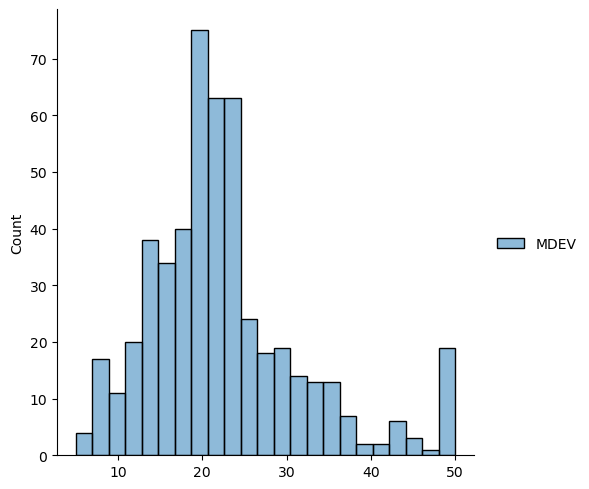

In [ ]:
sns.displot(boston_target);

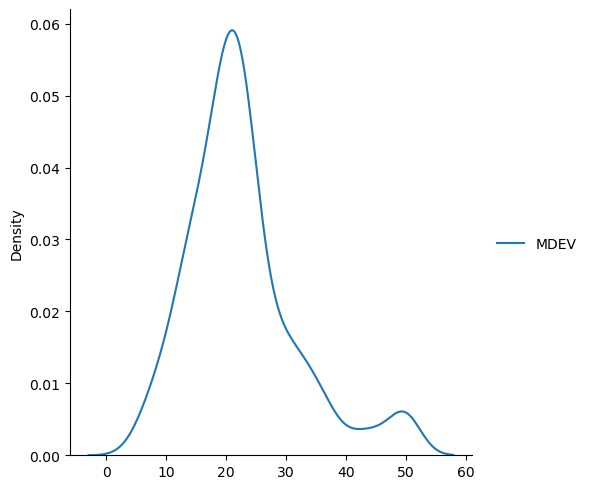

In [ ]:
sns.displot(boston_target, kind='kde');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


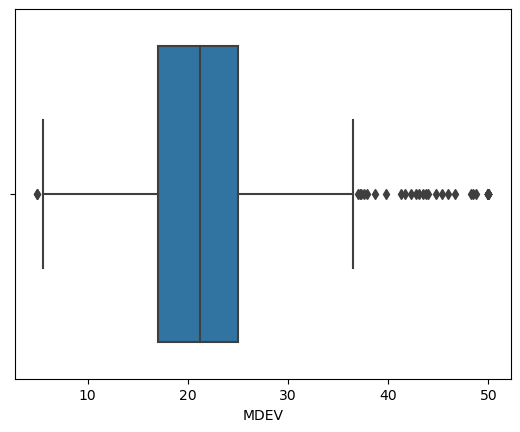

In [ ]:
sns.boxplot(boston_target['MDEV']);

In [ ]:
boston['MDEV']=boston_target['MDEV']

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
matrice_de_correlation=boston.corr().round(3)
matrice_de_correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


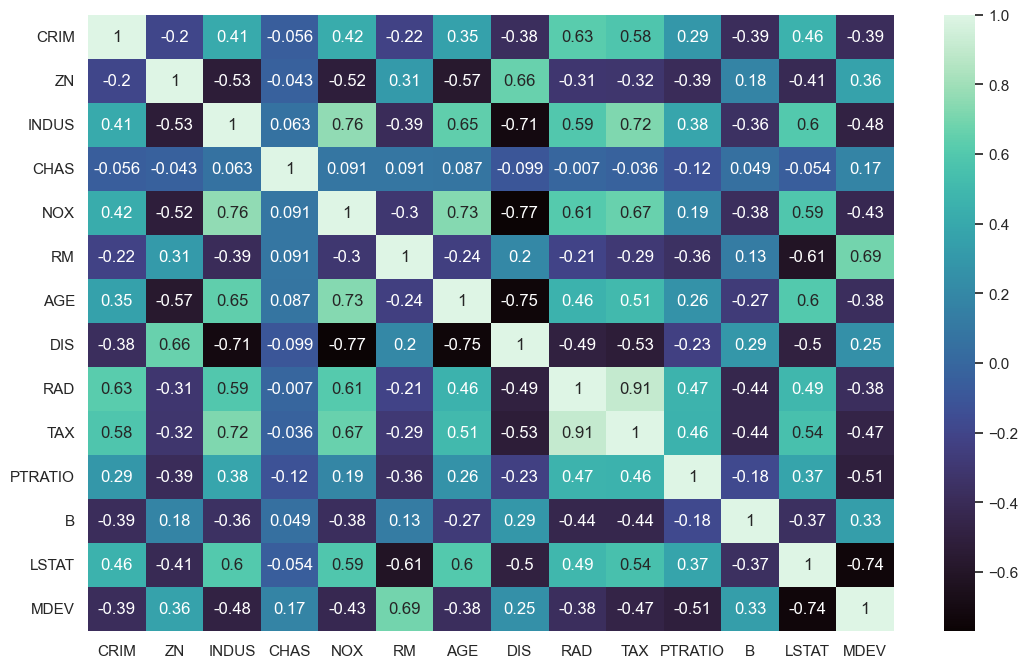

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(data=matrice_de_correlation, annot=True, cmap='mako');

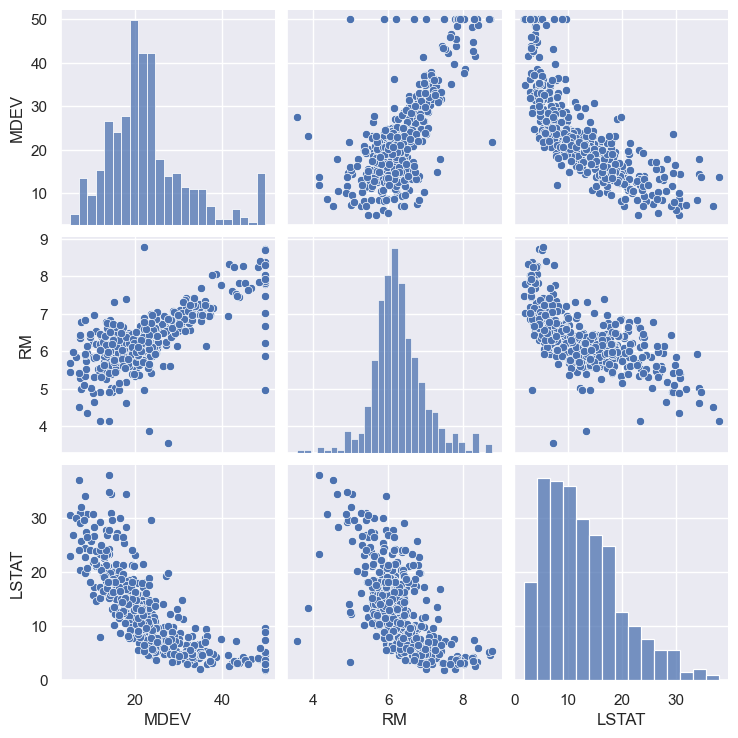

In [ ]:
sns.pairplot(data=boston[['MDEV','RM','LSTAT']]);

In [ ]:
# Préparation du modèle de Régression

In [ ]:
X=boston[['LSTAT','RM']]
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
Y=boston['MDEV']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MDEV, Length: 506, dtype: float64

In [ ]:
# Découpage en données d'entrainements et de tests

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [ ]:
X_train

,LSTAT,RM
42,5.81,6.169
58,6.86,6.145
385,30.81,5.277
78,12.34,6.232
424,17.16,5.565
...,...,...
255,9.25,5.876
72,5.52,6.065
396,19.37,6.405
235,10.88,6.086


In [ ]:
X_test

,LSTAT,RM
307,7.53,6.849
343,7.18,6.696
47,18.80,6.030
67,8.10,5.878
362,10.19,5.362
...,...,...
92,8.16,6.442
224,4.14,8.266
110,13.00,6.195
426,15.69,5.837


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_modele=LinearRegression()
lin_modele.fit(X_train,y_train)

LinearRegression()

In [ ]:
lin_modele.intercept_

2.4934145277051805

In [ ]:
lin_modele.coef_

array([-0.65930795,  4.5389694 ])

In [ ]:
# L'équation est : Prix = 2.49 - 0.66 x LSTAT + 4.54 x RM

In [ ]:
lin_modele.predict([[7,6]])

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.1120753])

In [ ]:
lin_modele.score(X_train,y_train)

0.6251836356449056

In [ ]:
y_test_predict=lin_modele.predict(X_test)
r2_score(y_test,y_test_predict)

0.6753556251471676

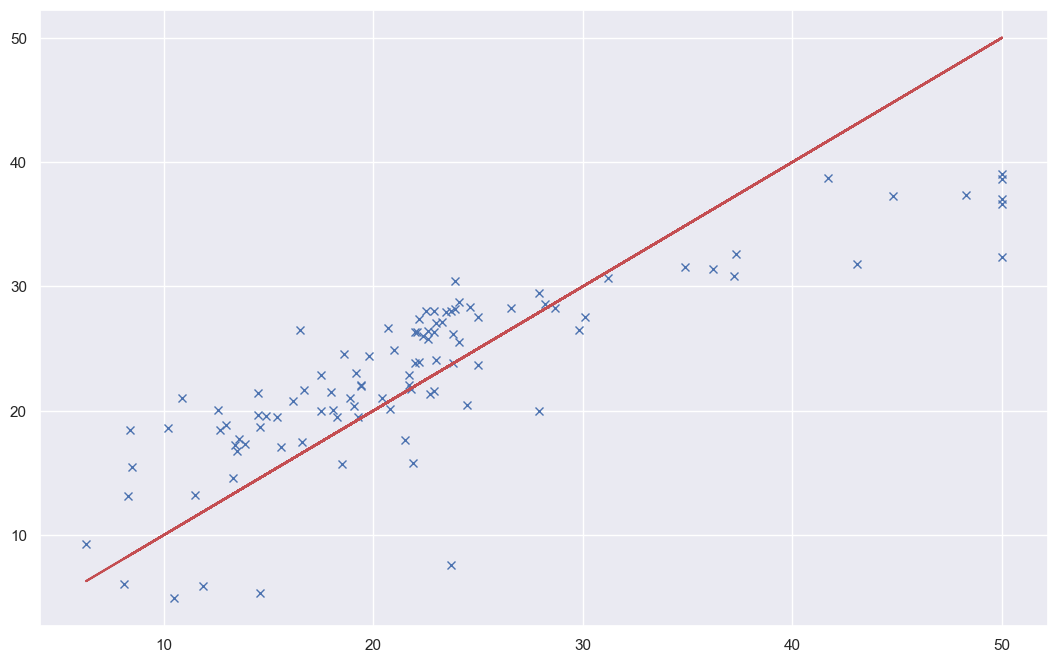

In [ ]:
plt.plot(y_test,y_test_predict, 'x', y_test,y_test,'r-');

In [ ]:
# Regression polynomiale (et multiple)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def polynomes(degre):
    poly_features=PolynomialFeatures(degree=degre)
    X_train_poly=poly_features.fit_transform(X_train)
    poly_modele=LinearRegression()
    poly_modele.fit(X_train_poly,y_train)
    y_train_predict=poly_modele.predict(X_train_poly)
    r2_train=r2_score(y_train,y_train_predict)
    print('POLYNOME DE DEGRE ',degre)
    print('R2 ENTRAINEMENT = ', round(r2_train,4))
    X_test_poly=poly_features.fit_transform(X_test)
    y_test_predict=poly_modele.predict(X_test_poly)
    r2_test=r2_score(y_test,y_test_predict)
    print('R2 TEST = ', round(r2_test,4))
    print()

In [ ]:
polynomes(1)

POLYNOME DE DEGRE  1

R2 ENTRAINEMENT =  0.6252
R2 TEST =  0.6754



In [ ]:
polynomes(2)

POLYNOME DE DEGRE  2

R2 ENTRAINEMENT =  0.7365
R2 TEST =  0.8218



In [ ]:
for i in range(1,15):
    polynomes(i)
    print()

POLYNOME DE DEGRE  1

R2 ENTRAINEMENT =  0.6252
R2 TEST =  0.6754


POLYNOME DE DEGRE  2

R2 ENTRAINEMENT =  0.7365
R2 TEST =  0.8218


POLYNOME DE DEGRE  3

R2 ENTRAINEMENT =  0.7517
R2 TEST =  0.8302


POLYNOME DE DEGRE  4

R2 ENTRAINEMENT =  0.7805
R2 TEST =  0.8138


POLYNOME DE DEGRE  5

R2 ENTRAINEMENT =  0.8002
R2 TEST =  0.7617


POLYNOME DE DEGRE  6

R2 ENTRAINEMENT =  0.8072
R2 TEST =  0.736


POLYNOME DE DEGRE  7

R2 ENTRAINEMENT =  0.8105
R2 TEST =  0.0656


POLYNOME DE DEGRE  8

R2 ENTRAINEMENT =  0.8125
R2 TEST =  0.257


POLYNOME DE DEGRE  9

R2 ENTRAINEMENT =  0.8083
R2 TEST =  0.1167


POLYNOME DE DEGRE  10

R2 ENTRAINEMENT =  0.7646
R2 TEST =  -0.0596


POLYNOME DE DEGRE  11

R2 ENTRAINEMENT =  0.8193
R2 TEST =  -11.3376


POLYNOME DE DEGRE  12

R2 ENTRAINEMENT =  0.815
R2 TEST =  -8.5031


POLYNOME DE DEGRE  13

R2 ENTRAINEMENT =  0.8099
R2 TEST =  -1.6807


POLYNOME DE DEGRE  14

R2 ENTRAINEMENT =  0.7267
R2 TEST =  -2.5032




In [ ]:
# Il nous reste la régression LOGISTIQUE !! C'est la meilleure !!!!!! Le TOP